#Implementing K-Means Algorithm to cluster the Credit card data

Importing Dataset

In [1]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("credit_card.csv")

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25,8) #Zoom in for better view of graphs
from sklearn.metrics import silhouette_samples,silhouette_score

Exploratory Data Analysis

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

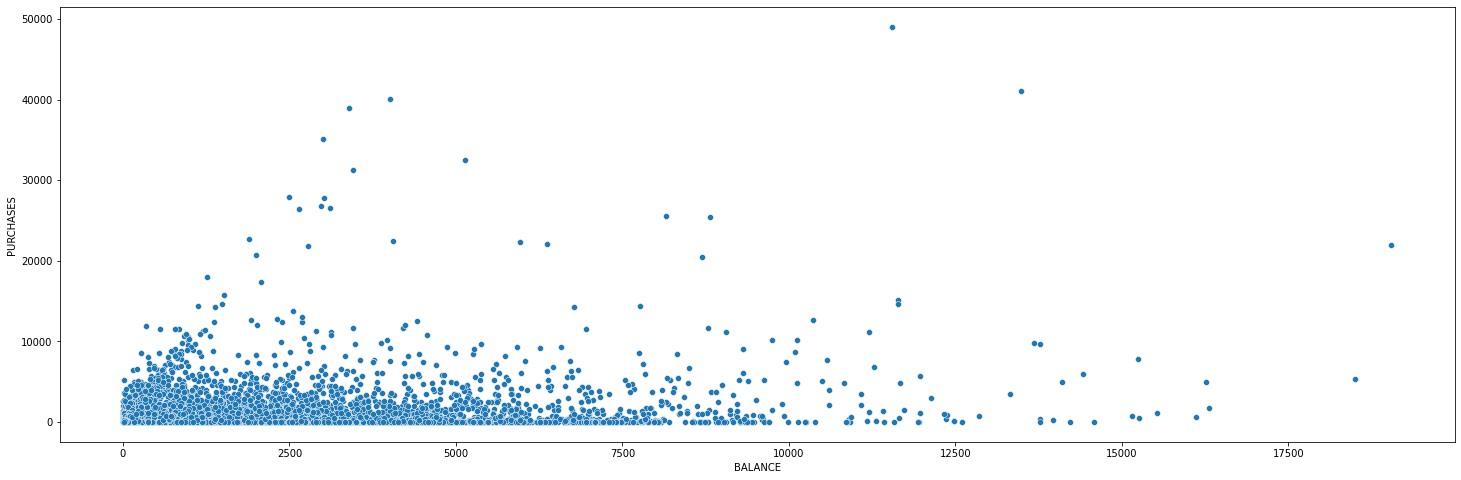

In [5]:
sns.scatterplot(x='BALANCE',y="PURCHASES",data=data)

>Dropping Null values as the count is less than 5%

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
data.shape

(8636, 18)

In [ ]:
cust_id=data['CUST_ID']


In [ ]:
data.drop('CUST_ID',axis=1,inplace=True)

>Box plot to see the intensity of Outliers in each feature

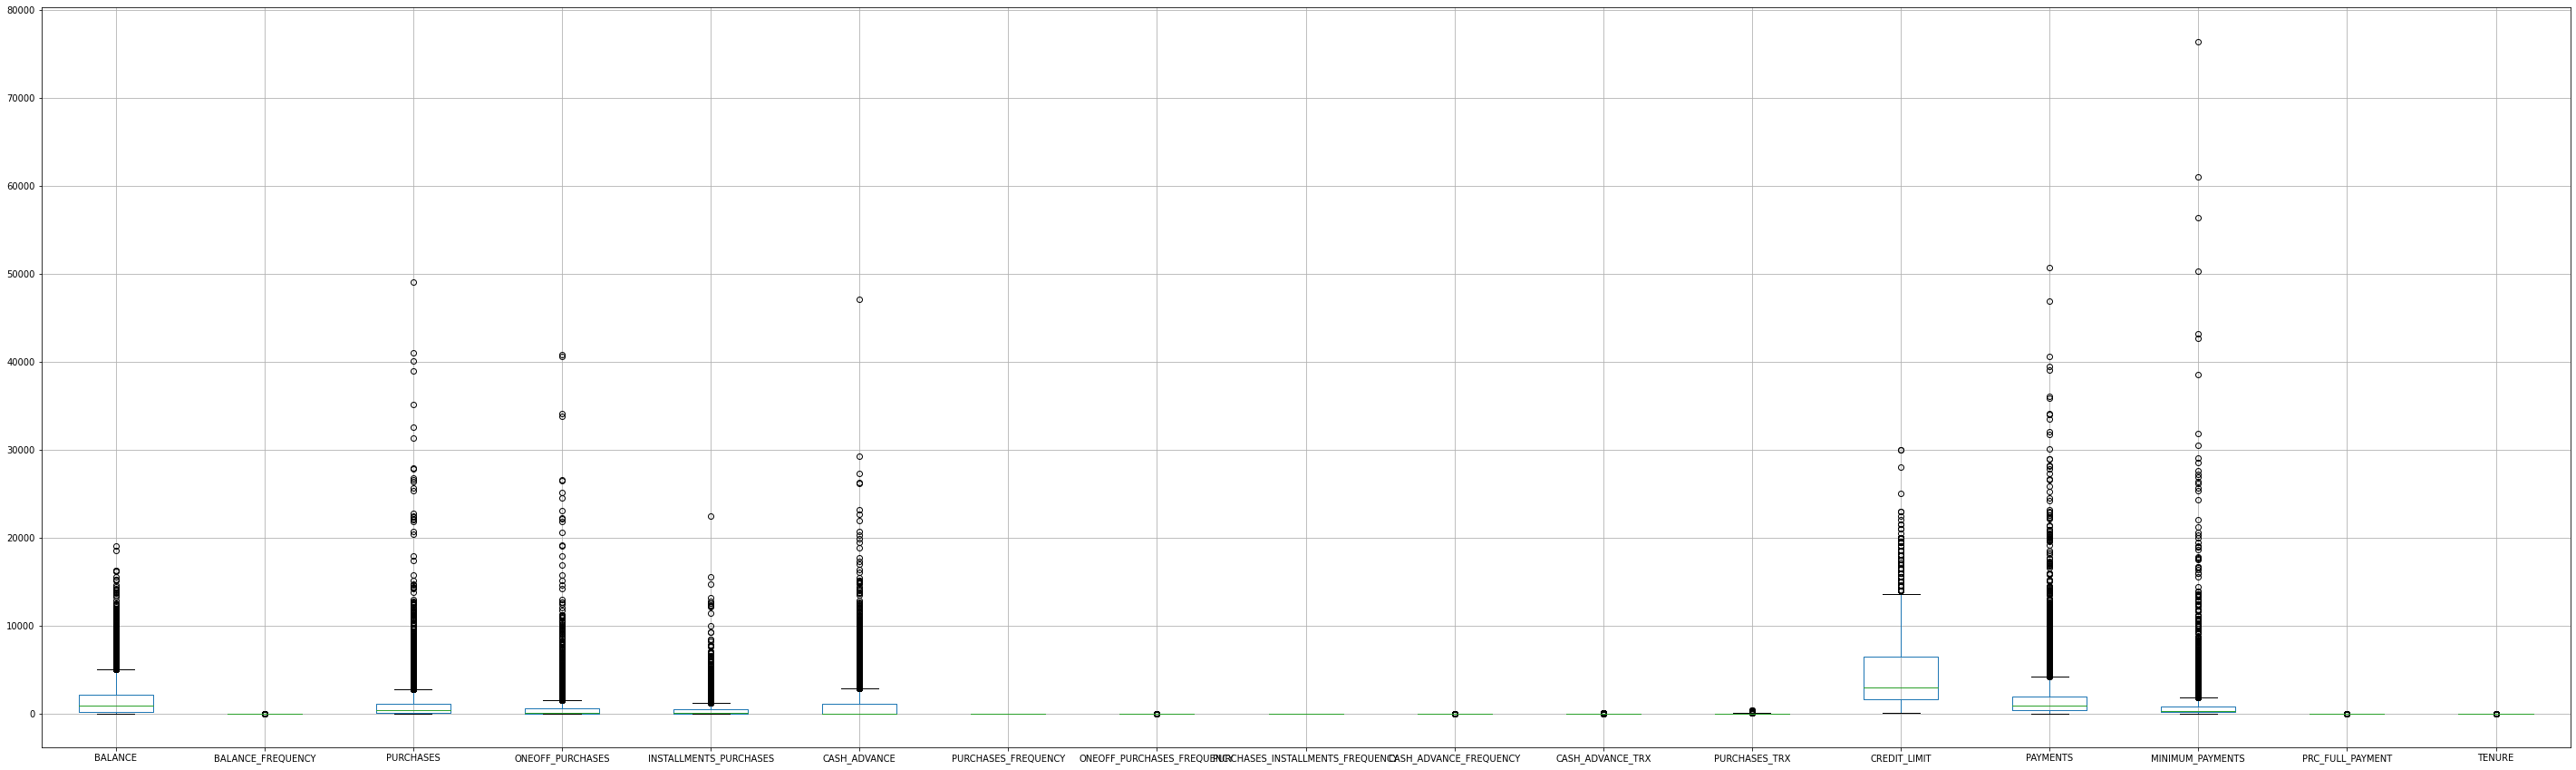

In [ ]:
data.boxplot()

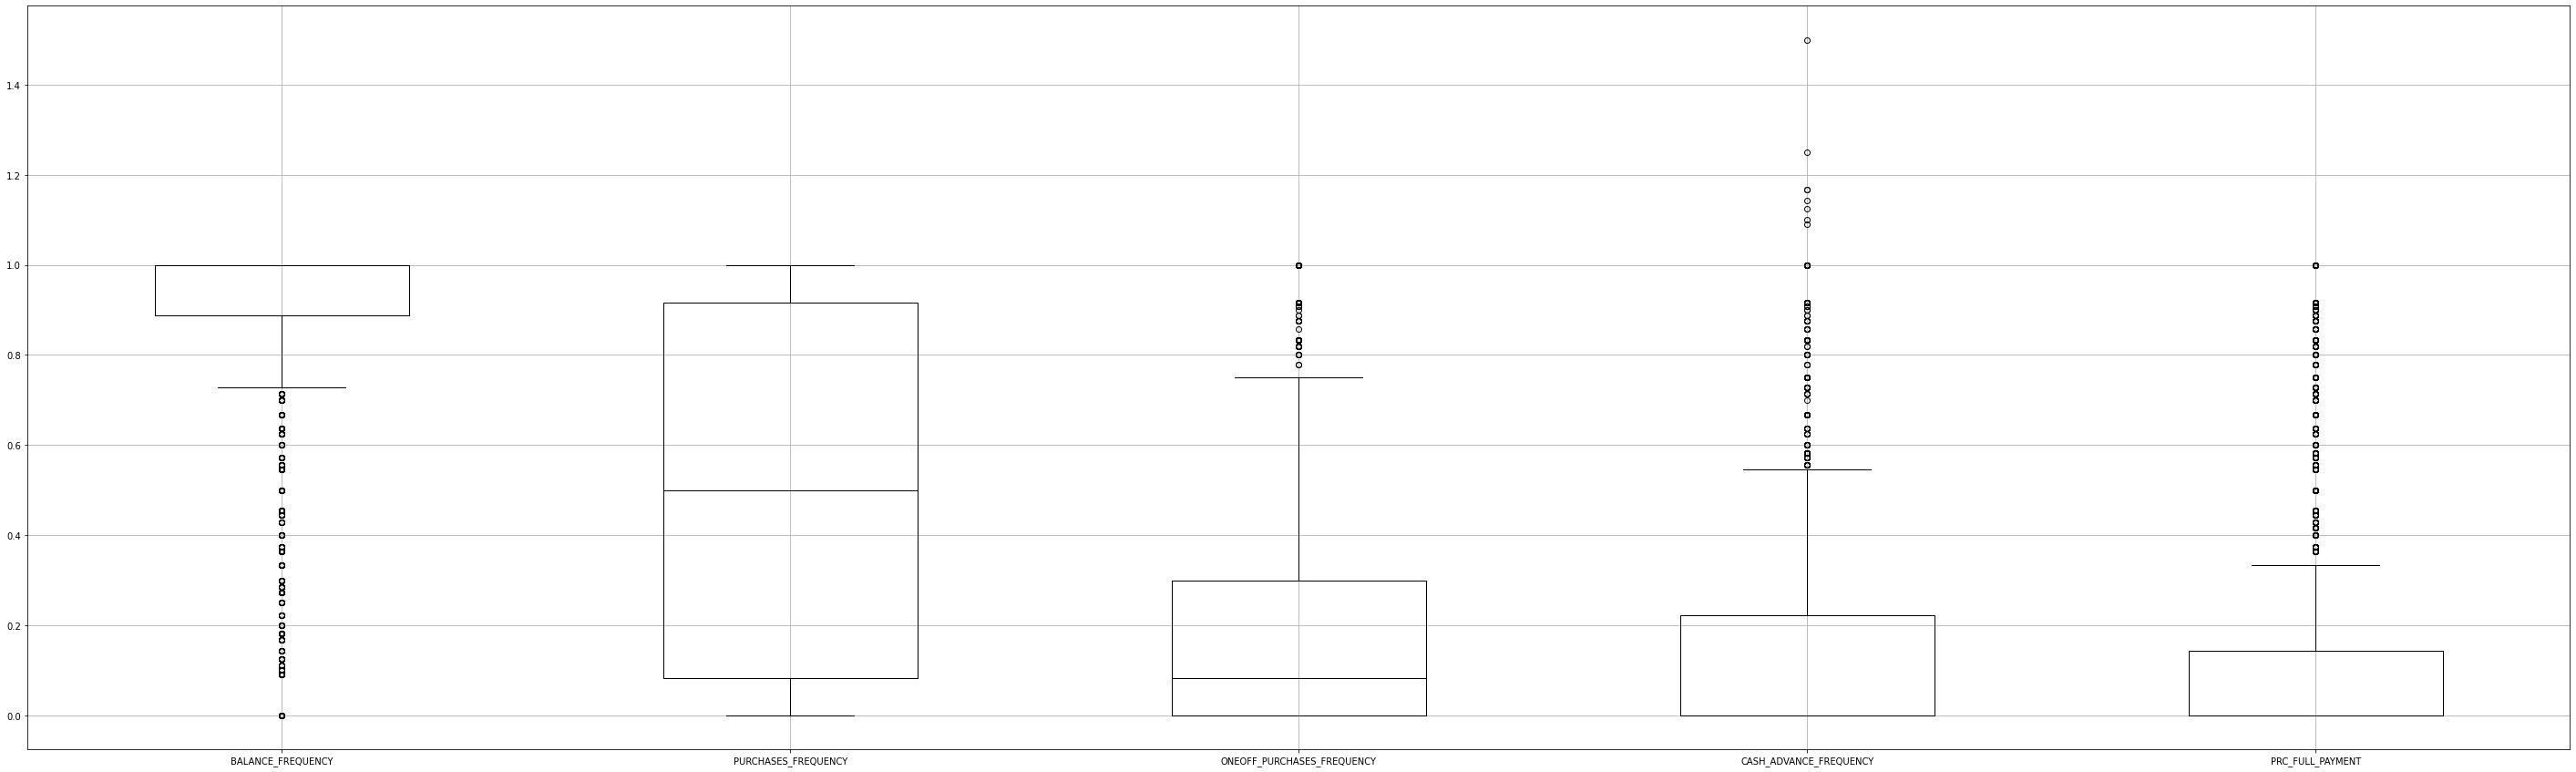

In [ ]:
data.boxplot(['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT'],color='black')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['TENURE']=lb.fit_transform(data['TENURE'])

In [ ]:
data['TENURE'].unique()

array([6, 2, 5, 3, 4, 0, 1])

In [ ]:
from scipy.stats import zscore

In [ ]:
zescore=pd.DataFrame()
for i in data.columns.drop("TENURE"):
  zescore[i]=zscore(data[i])

In [ ]:
indexes=[]
for i in zescore.columns:
  x=zescore.loc[zescore[i]<=-3].index
  if(len(x)>0):
    indexes.append(x)
    print(i,indexes)



BALANCE_FREQUENCY [Int64Index([ 181,  248,  305,  322,  497,  619,  639,  695,  723,  750,
            ...
            8345, 8373, 8389, 8414, 8420, 8446, 8447, 8478, 8487, 8573],
           dtype='int64', length=168)]


In [ ]:
common=indexes[0]
for i in indexes:
  common=common.intersection(i)
  print(common)

Int64Index([ 181,  248,  305,  322,  497,  619,  639,  695,  723,  750,
            ...
            8345, 8373, 8389, 8414, 8420, 8446, 8447, 8478, 8487, 8573],
           dtype='int64', length=168)


>Scalling data to mean zero and unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_scaled)
reduced = pca.transform(data_scaled)

In [ ]:
reduced=pd.DataFrame(reduced,columns=range(1,13))
reduced

,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570
...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,-0.536715,0.022820
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0.163099,0.006543
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0.129506,0.067975
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,-0.332938,-0.126709


>Kmeans means model over 2 - 10 clusters in order to get the best fit of clusters for data

In [ ]:
silhouette_vals={}
sse=[]
from sklearn.cluster import KMeans
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=14)
  pred=kmeans.fit_predict(reduced)
  silhouette_vals.update({i: silhouette_score(reduced,pred,metric='euclidean')})
  sse.append(kmeans.inertia_)

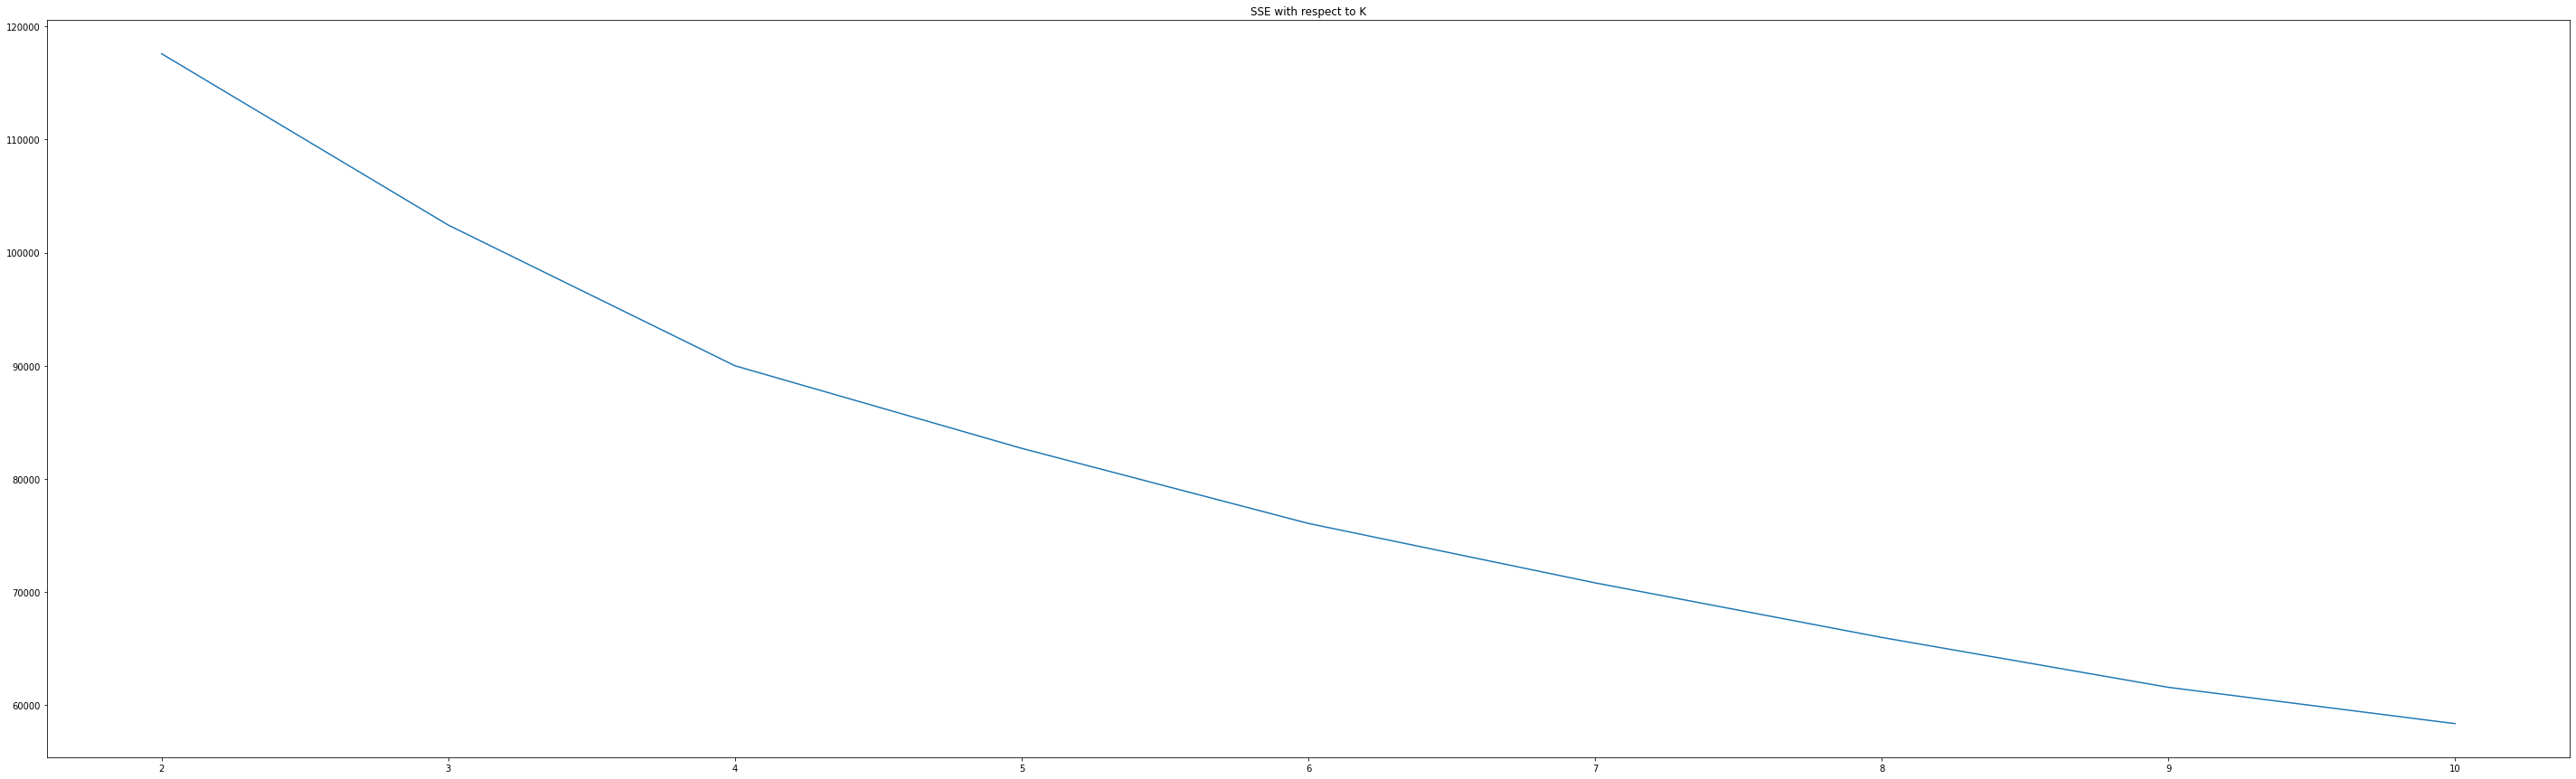

In [ ]:
import matplotlib.pyplot as plt
plt.title('SSE with respect to K')
plt.plot(range(2,11),sse)

>Using 4 Clusters because max bend in curve is seen at Cluster value 4

In [ ]:
 kmeans=KMeans(n_clusters=4)
 pred=kmeans.fit_predict(reduced)

In [ ]:
reduced.drop("User",inplace=True,axis=1)

In [ ]:
reduced['User']=cust_id

In [ ]:
reduced['User']

0       C10001
1       C10002
2       C10003
3          NaN
4       C10005
         ...  
8631    C18865
8632    C18866
8633    C18867
8634    C18868
8635    C18869
Name: User, Length: 8636, dtype: object

In [ ]:
reduced

,1,2,3,4,5,6,7,8,9,10,11,12,User
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144,C10001
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741,C10002
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779,C10003
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286,NaN
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570,C10005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,-0.536715,0.022820,C18865
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0.163099,0.006543,C18866
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0.129506,0.067975,C18867
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,-0.332938,-0.126709,C18868


In [ ]:
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8636 non-null   float64
 1   2       8636 non-null   float64
 2   3       8636 non-null   float64
 3   4       8636 non-null   float64
 4   5       8636 non-null   float64
 5   6       8636 non-null   float64
 6   7       8636 non-null   float64
 7   8       8636 non-null   float64
 8   9       8636 non-null   float64
 9   10      8636 non-null   float64
 10  11      8636 non-null   float64
 11  12      8636 non-null   float64
 12  User    8339 non-null   object 
dtypes: float64(12), object(1)
memory usage: 877.2+ KB


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
cust_id=[]

In [ ]:
for i in range(1,8637):
  cust_id.append(i)

In [ ]:
cust_id=pd.DataFrame(cust_id,columns=['id'])

In [ ]:
reduced['User']=cust_id

In [ ]:
reduced

,1,2,3,4,5,6,7,8,9,10,11,12,User
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144,1
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741,2
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779,3
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286,4
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-2.221637,-1.328411,1.643826,-1.421354,-0.175573,3.518499,-1.313848,-0.870622,-0.590283,-0.185911,-0.536715,0.022820,8632
8632,-0.362326,-2.032249,-0.875053,-2.800940,-0.313566,2.808854,-1.549426,-0.210773,1.342838,-0.745134,0.163099,0.006543,8633
8633,-0.930026,-1.841236,-0.350037,-2.351591,-0.219492,3.090269,-1.421757,-0.630976,0.558226,-0.779909,0.129506,0.067975,8634
8634,-2.356010,-0.718730,1.048522,-1.776467,-0.552690,3.333452,-0.996810,-0.263088,0.972588,0.340042,-0.332938,-0.126709,8635


>Graph to show how our values are assigned to different cluster

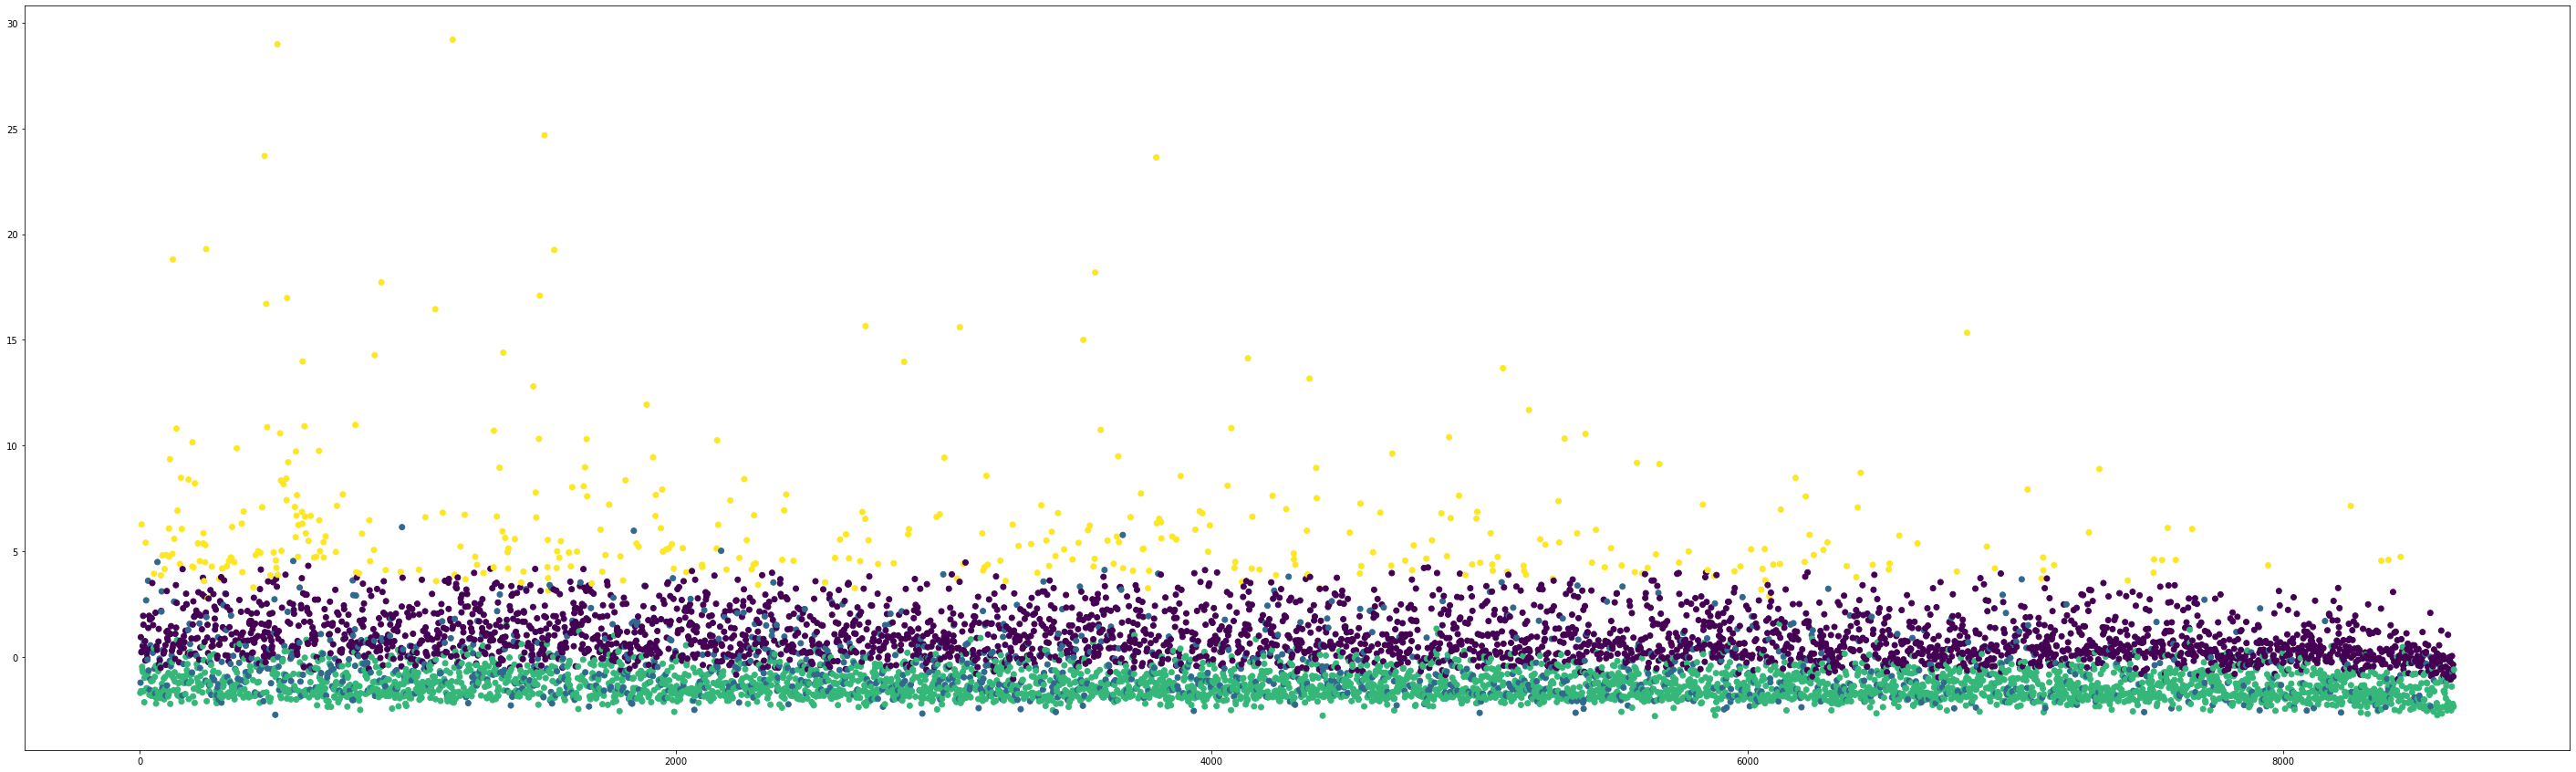

In [ ]:
plt.scatter(reduced['User'],reduced[1],c=kmeans.labels_)

>Graph to show the number of datapoints in each clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


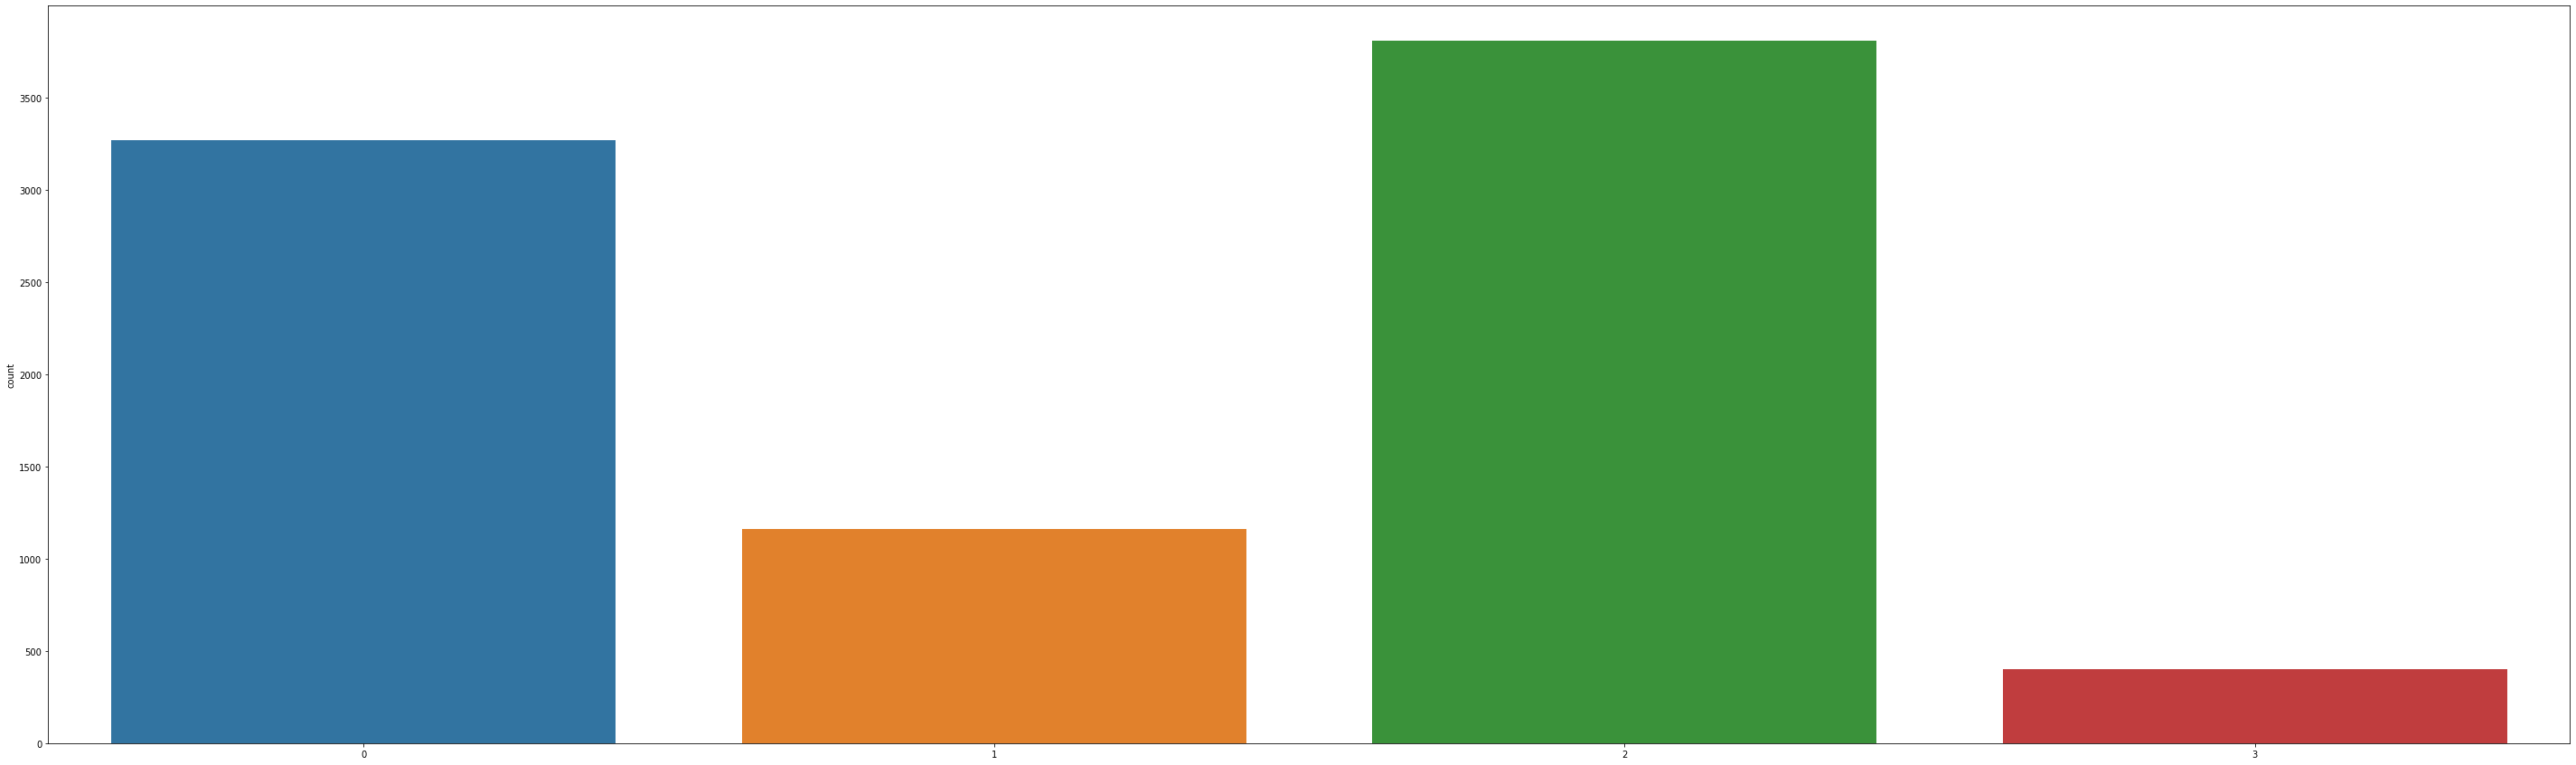

In [ ]:
sns.countplot(kmeans.labels_)